# Heart Disease Dataset
## AML - 1114  - Data Science and Machine Learning

### Anil - C0
### Richard Roy - C0932997
### Mahidhar Rao Katragadda - C0936754#
## Vijay - C0913018#
## Jignesh - C0#

# Introduction


# Abstract

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
Heart_df = pd.read_csv("C://Users//Administrator//Downloads//1_1st dataset heart disease (1).csv")

### *Data Exploration*

In [97]:
# To get the dimension of the dataset
print('The shape of the data set is ',Heart_df.shape)

The shape of the data set is  (1190, 12)


In [98]:
Heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


# this value is goes on increase from 1 to 4. linearly increasing.

In [99]:
#printing the list of columns in the dataset
Heart_df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

<Axes: >

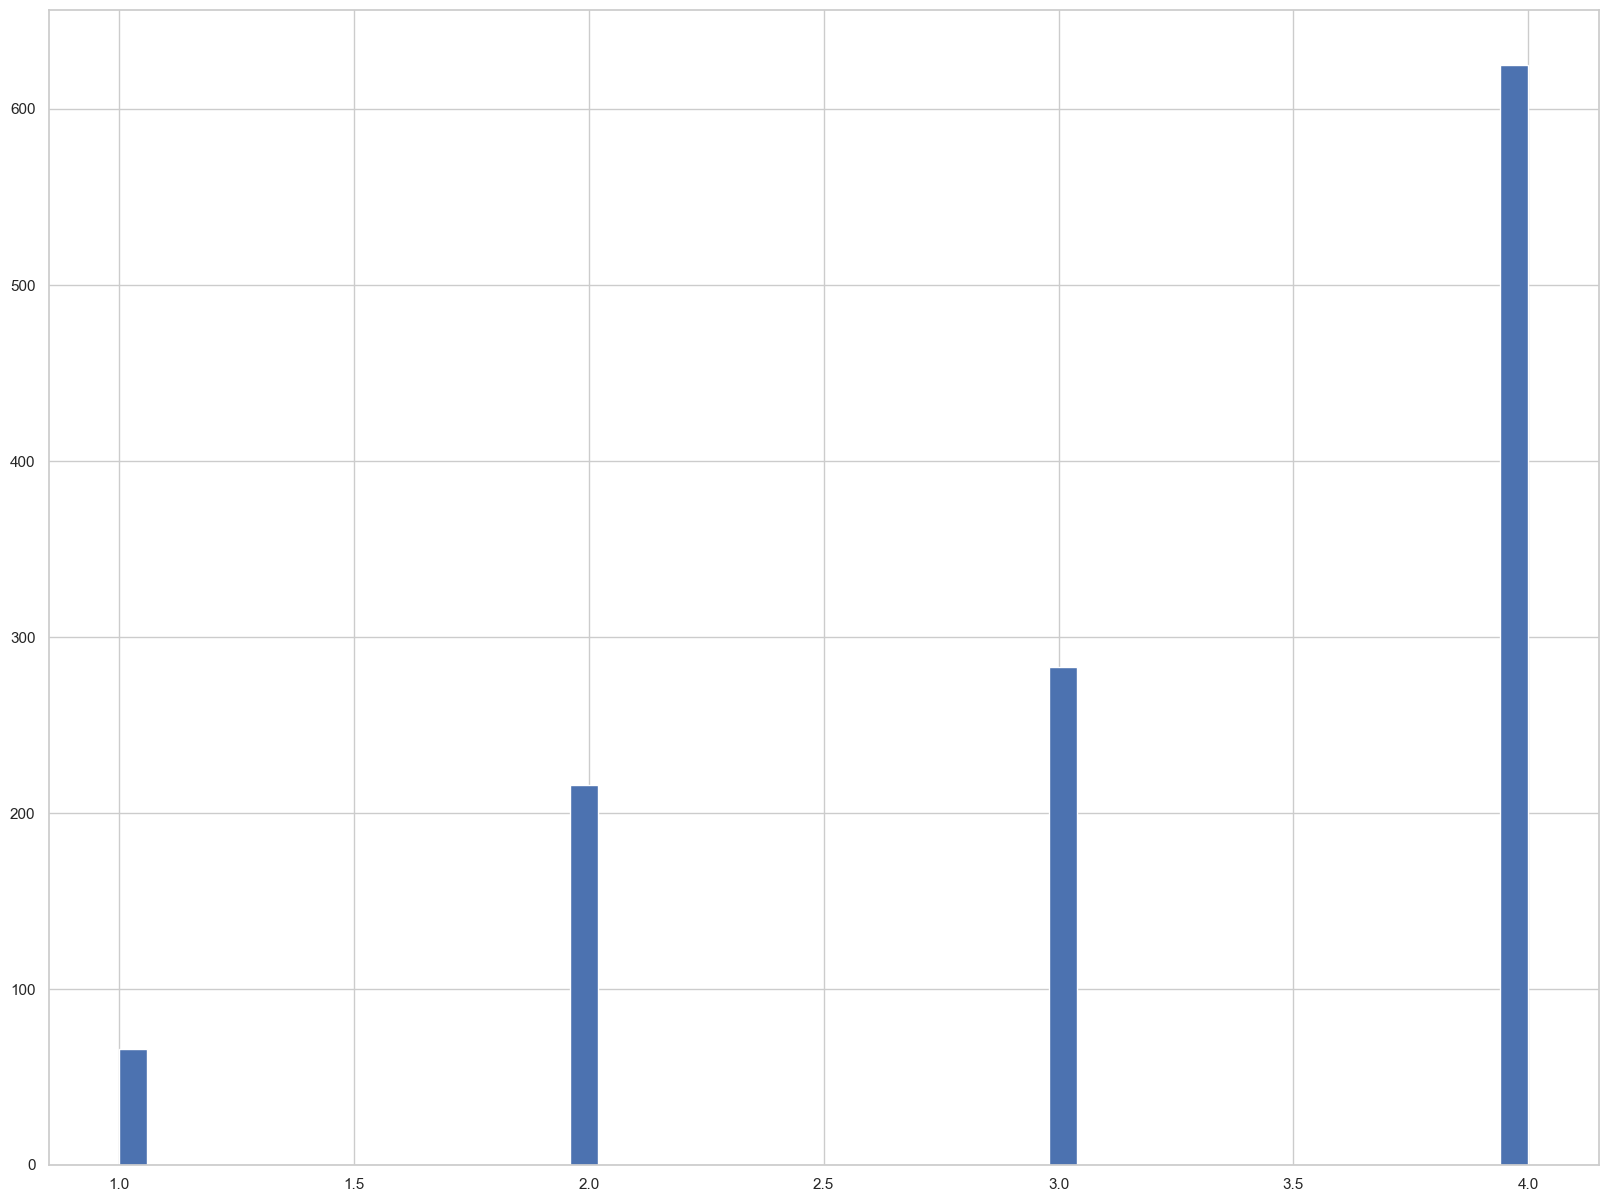

In [158]:
## Analyse the continuous values by creating histograms to understand the distribution
Heart_df['chest pain type'].hist(bins=50, figsize=(20,15))

#### From the above information, our dataset doesn't contain any object datatype as all the columns are of type numerical

In [100]:
Heart_df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [101]:
Heart_df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

#### There are no null values present in the dataset

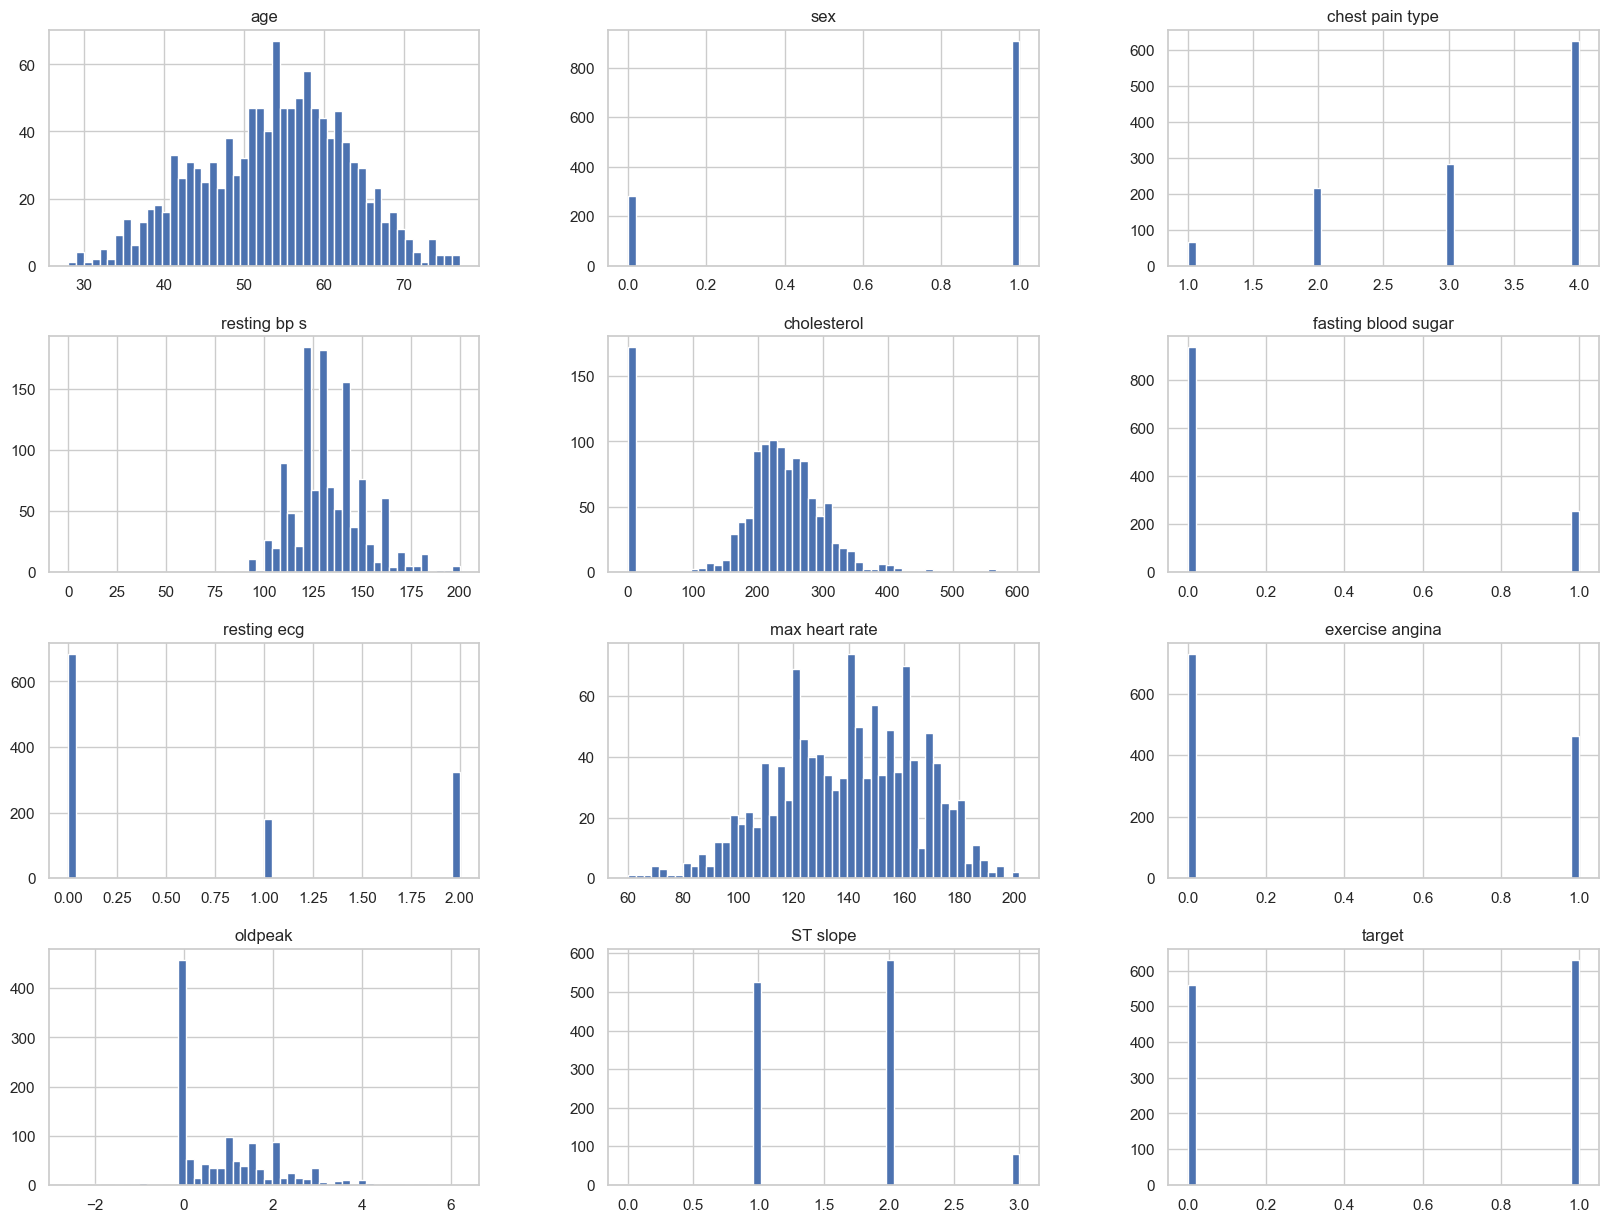

In [102]:
## Analyse the continuous values by creating histograms to understand the distribution
Heart_df.hist(bins=50, figsize=(20,15))
plt.show()

#### We can see that sex, chest pain type ,resting ecg, exercise angina, ST slope  and target are categorical fields 

<Axes: >

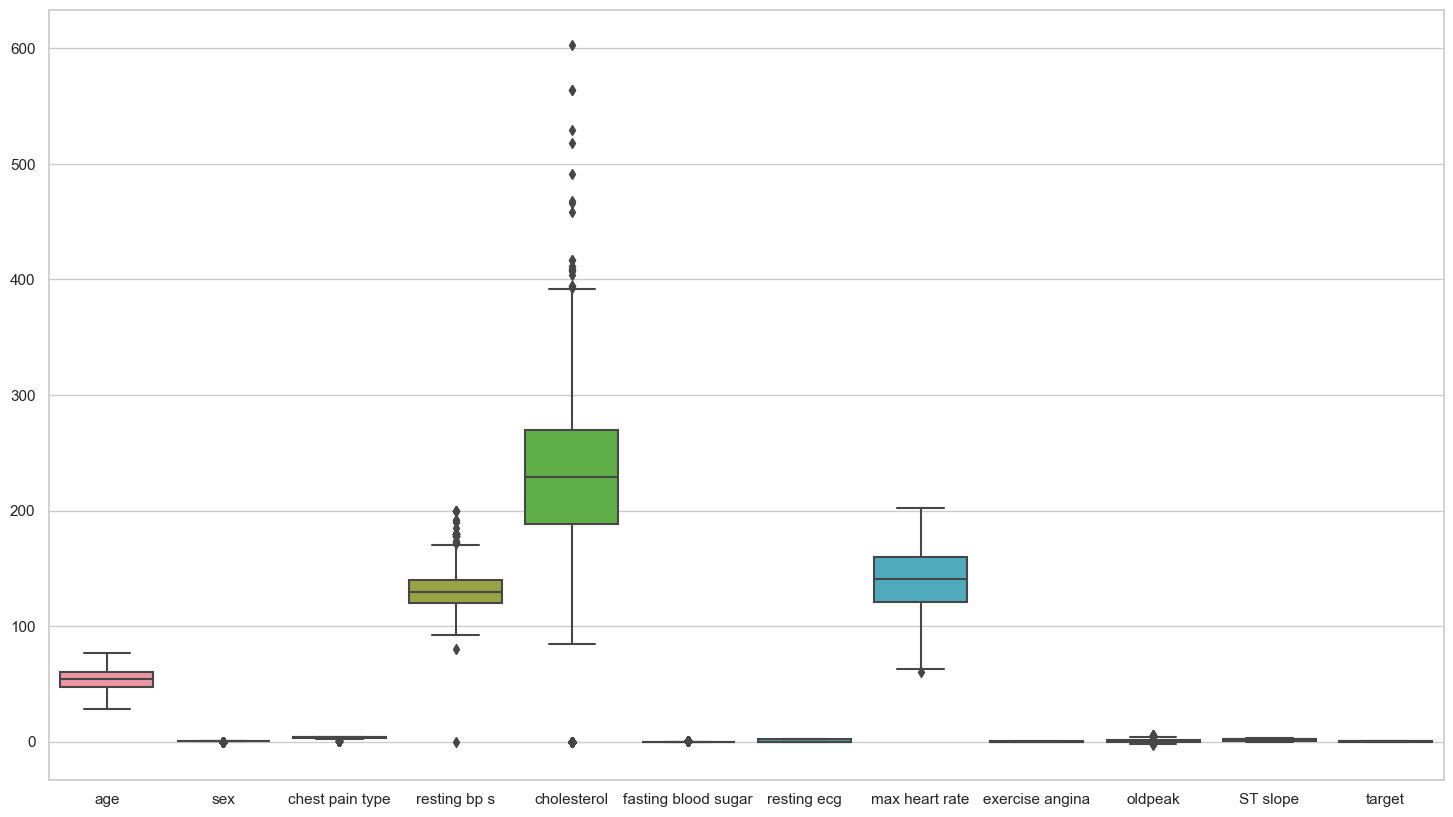

In [103]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=Heart_df)

###  

In [105]:
df.nunique()# checking the unique value

target                   0
age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
age_group                3
cholesterol_group        3
Target                   1
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



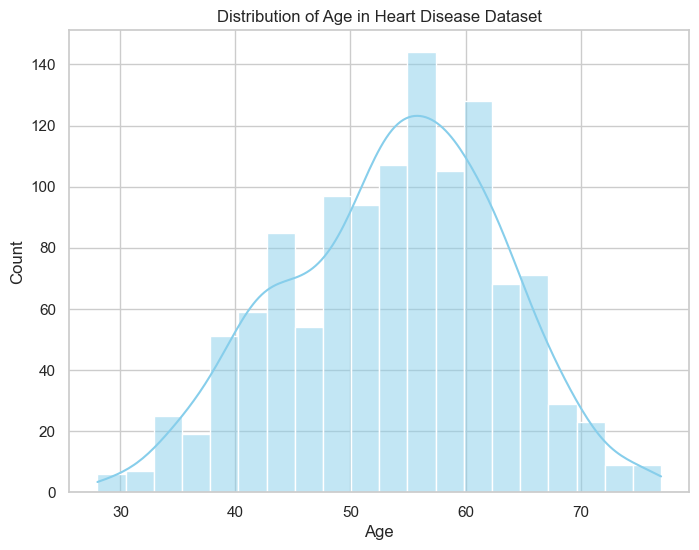

In [106]:
# Create a distribution plot for age
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(Heart_df, x='age', bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age in Heart Disease Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

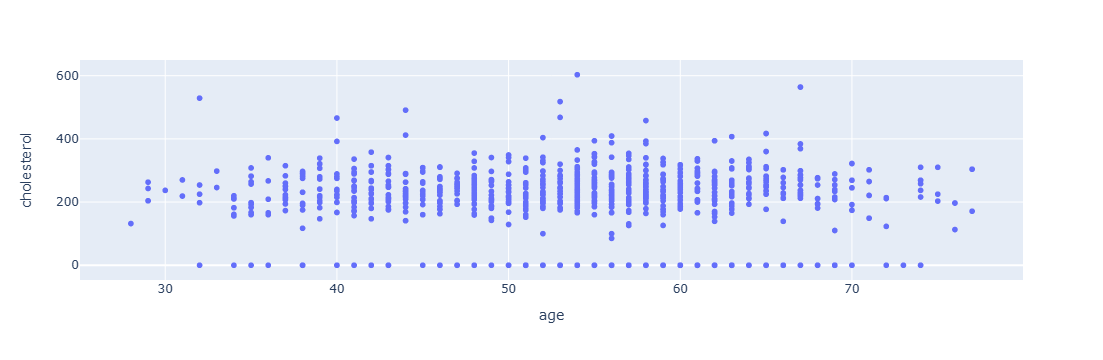

In [162]:
import plotly.express as px

# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="age", y="cholesterol", hover_data=['age', 'cholesterol'])
fig.show()


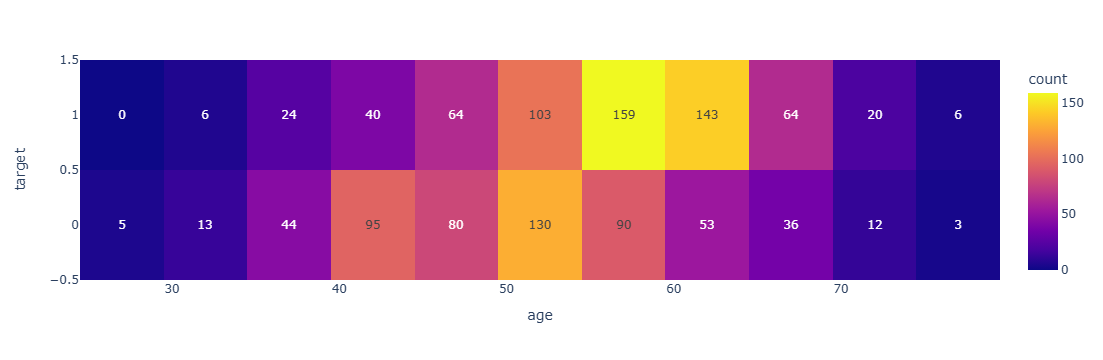

In [108]:
fig = px.density_heatmap(Heart_df, x="age", y="target", text_auto=True)
fig.show()

### 

In [109]:
# sex
Heart_df['sex'].value_counts().sort_index()

sex
0    281
1    909
Name: count, dtype: int64

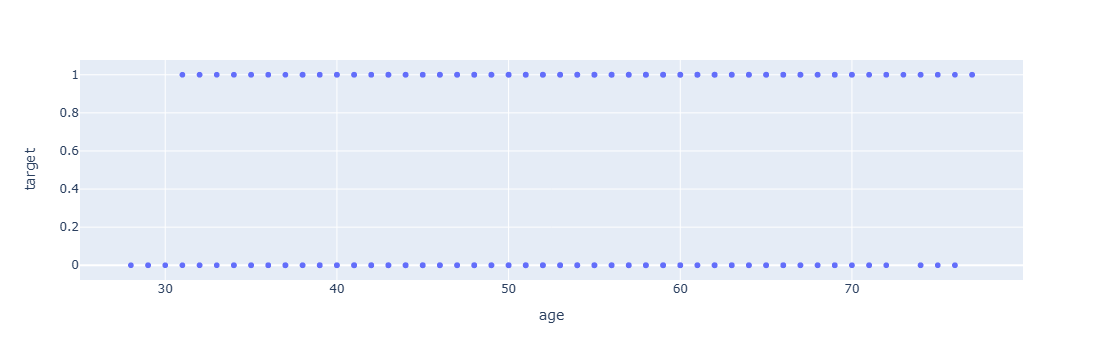

In [163]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="age", y="target", hover_data=['age', 'cholesterol'])
fig.show()


# we can see the heart disease above the age 31

In [110]:
Heart_df['chest pain type'].value_counts().sort_index()

chest pain type
1     66
2    216
3    283
4    625
Name: count, dtype: int64

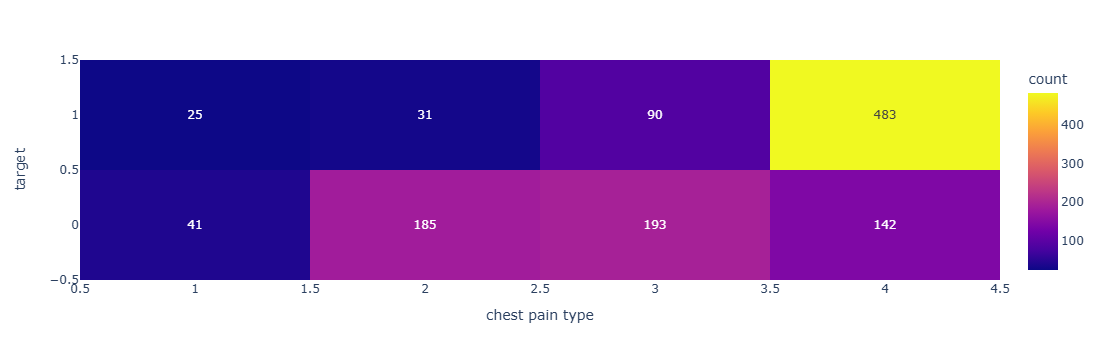

In [111]:
fig = px.density_heatmap(Heart_df, x="chest pain type", y="target", text_auto=True)
fig.show()

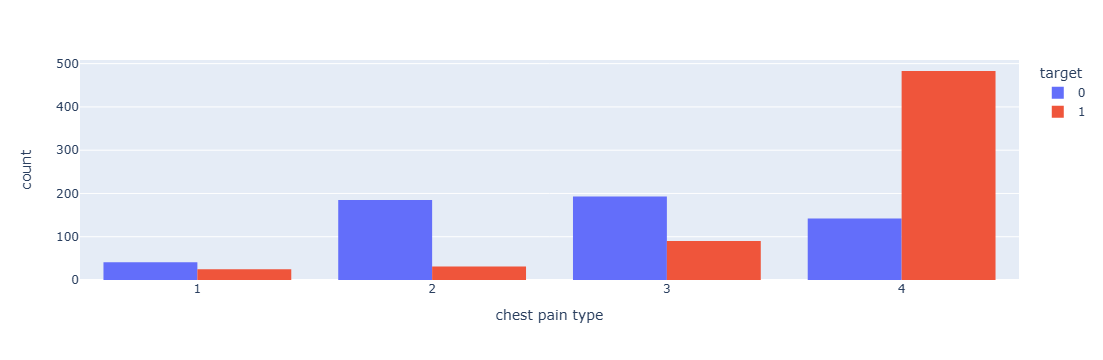

In [166]:
fig = px.histogram(Heart_df, x="chest pain type", color="target", barmode='group')
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



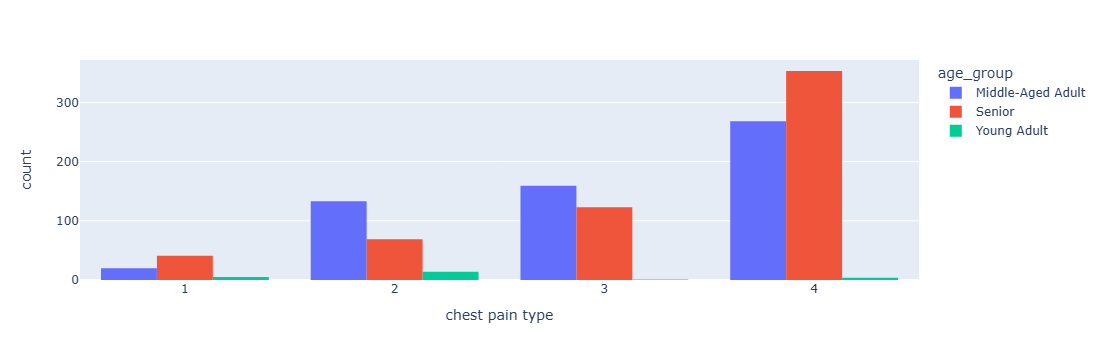

In [174]:
fig = px.histogram(df, x="chest pain type", color="age_group", barmode='group')
fig.show()

# from both group we can say that --chest pain increases with age and more chance to have hear-attack

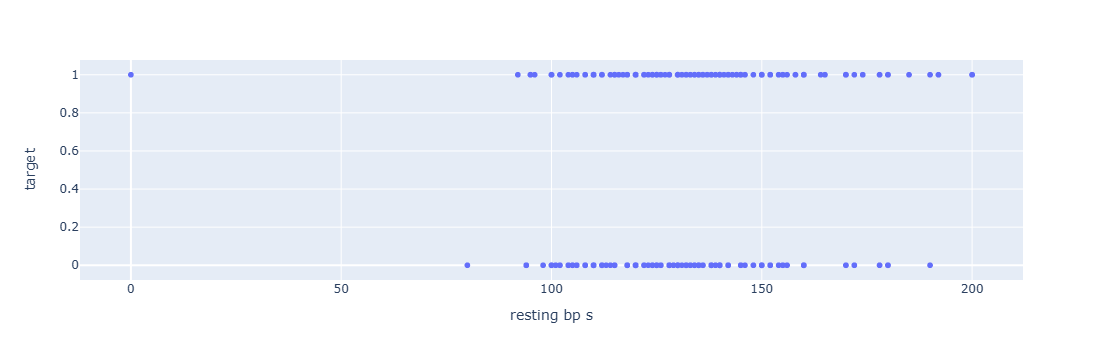

In [175]:
import plotly.express as px

# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="resting bp s", y="target", hover_data=['resting bp s', 'target'])
fig.show()


In [176]:
# we can delete the data below 100 and above 180.

<Axes: >

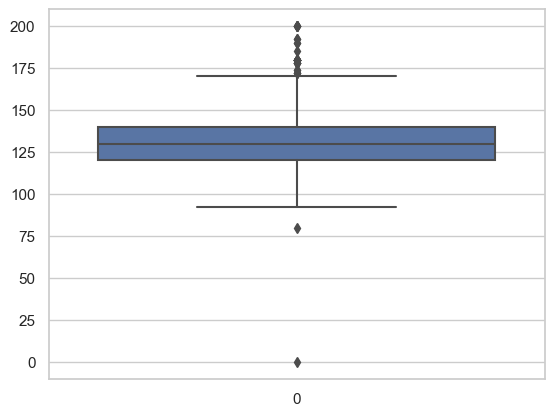

In [113]:
sns.boxplot(Heart_df['resting bp s'])

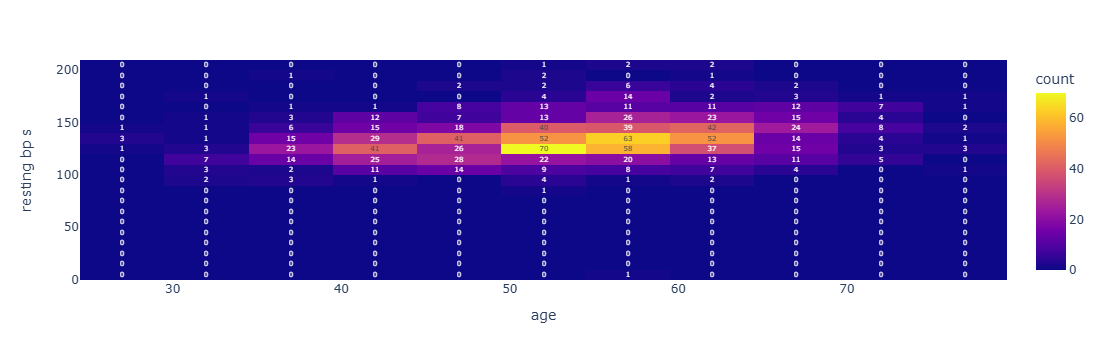

In [114]:
fig = px.density_heatmap(Heart_df, x="age", y="resting bp s", text_auto=True)
fig.show()

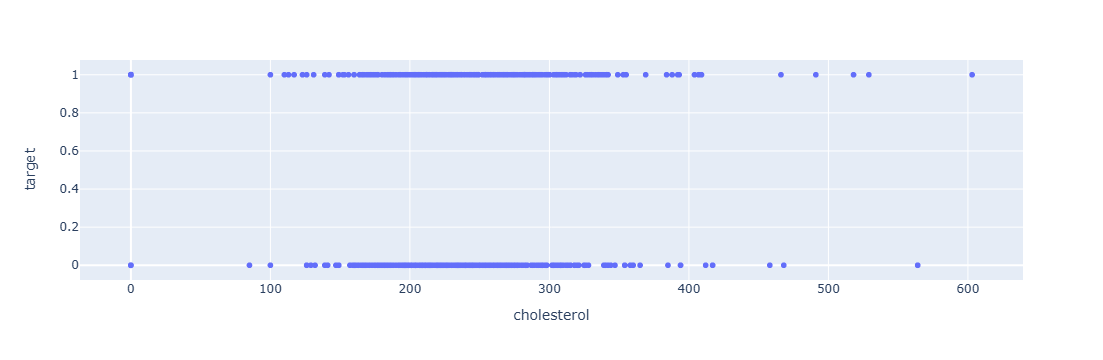

In [177]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="cholesterol", y="target", hover_data=['cholesterol', 'target'])
fig.show()


In [ ]:
# from 100 and 400.

In [115]:
# Handle outliers
Heart_df1=Heart_df.copy()

In [118]:
# 
Heart_df['cholesterol'].value_counts().sort_index()

cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      2
603      1
Name: count, Length: 222, dtype: int64

<Axes: >

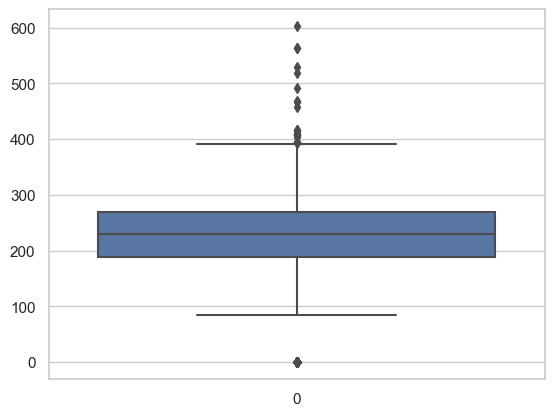

In [119]:
sns.boxplot(Heart_df['cholesterol'])

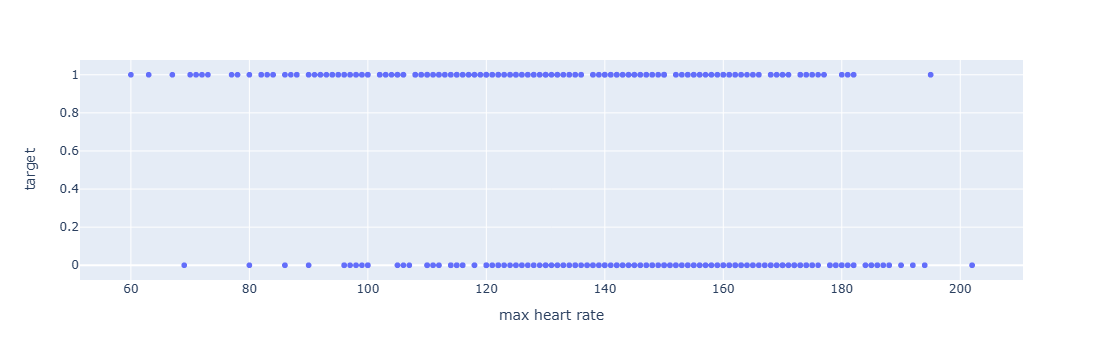

In [178]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="max heart rate", y="target", hover_data=['max heart rate', 'target'])
fig.show()


In [179]:
# we can delete 0 from 96 to 194

<Axes: >

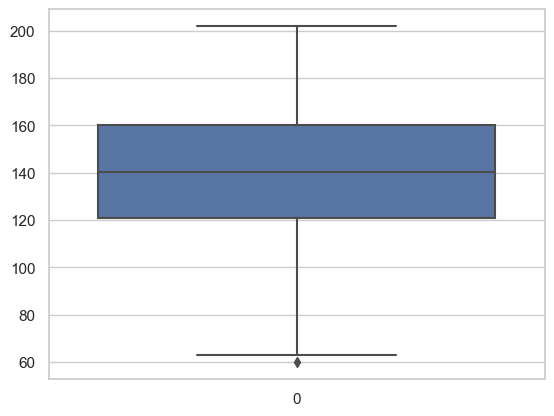

In [124]:
sns.boxplot(Heart_df['max heart rate'])

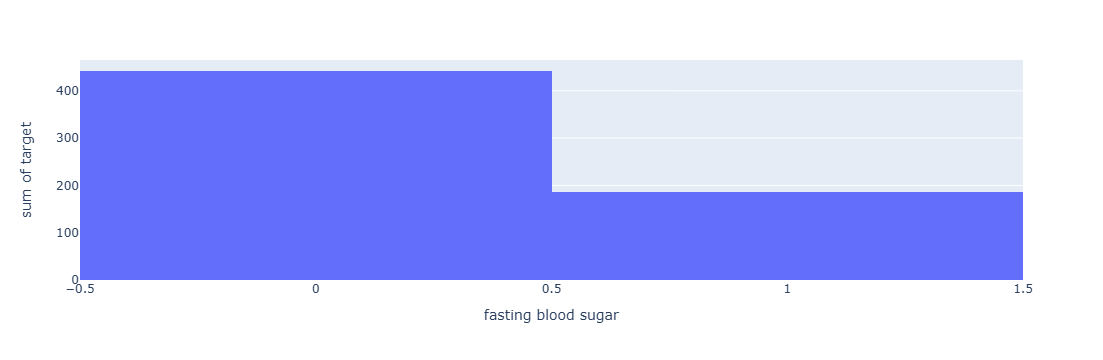

In [181]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.histogram(Heart_df, x="fasting blood sugar", y="target")
fig.show()


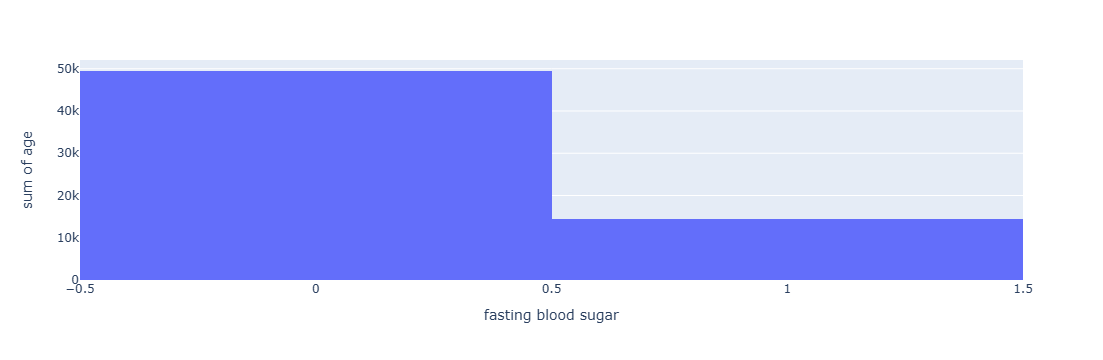

In [182]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.histogram(Heart_df, x="fasting blood sugar", y="age")
fig.show()

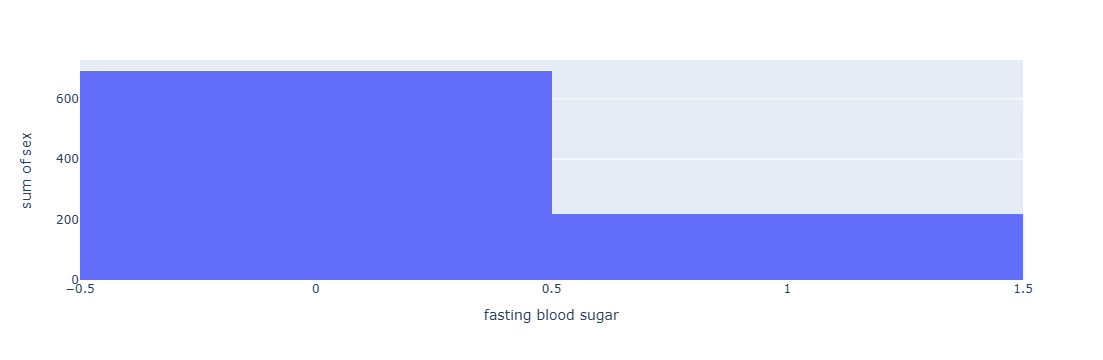

In [183]:
## Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.histogram(Heart_df, x="fasting blood sugar", y="sex")
fig.show()

In [ ]:
# more people are 

In [126]:
# fasting blood sugar
Heart_df['fasting blood sugar'].value_counts().sort_index()

fasting blood sugar
0    936
1    254
Name: count, dtype: int64

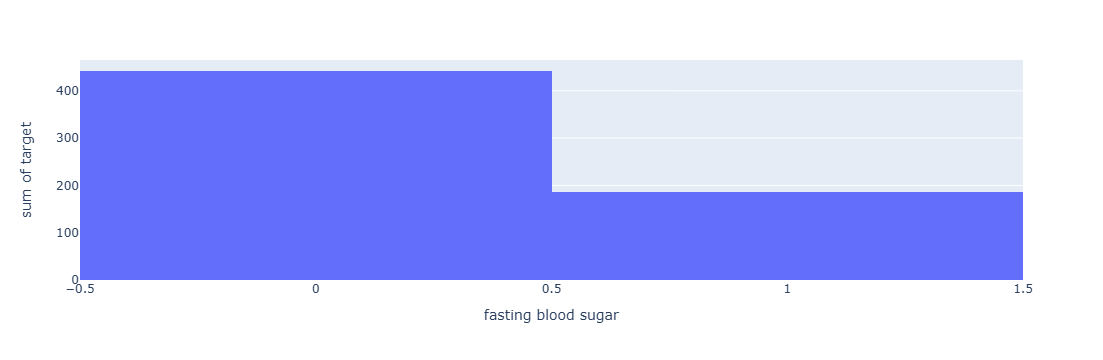

In [185]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.histogram(Heart_df, x="fasting blood sugar", y="target", hover_data=['fasting blood sugar', 'target'])
fig.show()


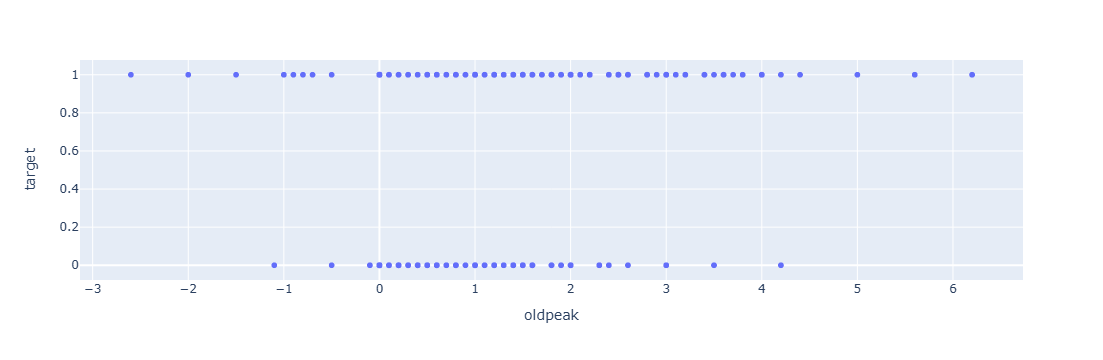

In [186]:
# Assuming Heart_df is loaded and contains 'age' and 'cholesterol'
fig = px.scatter(Heart_df, x="oldpeak", y="target", hover_data=['oldpeak', 'target'])
fig.show()


In [ ]:
# we can delete some part from 0 and 1 

<Axes: >

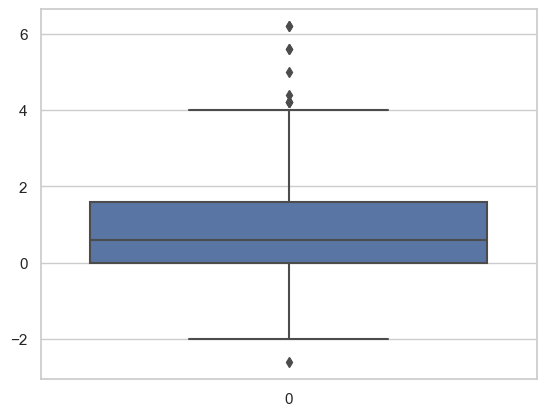

In [130]:
sns.boxplot(Heart_df['oldpeak'])

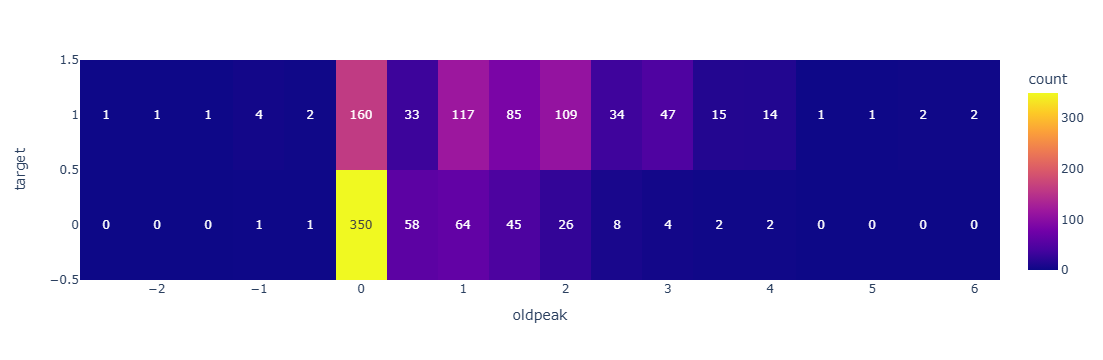

In [131]:
fig = px.density_heatmap(Heart_df, x="oldpeak", y="target", text_auto=True)
fig.show()

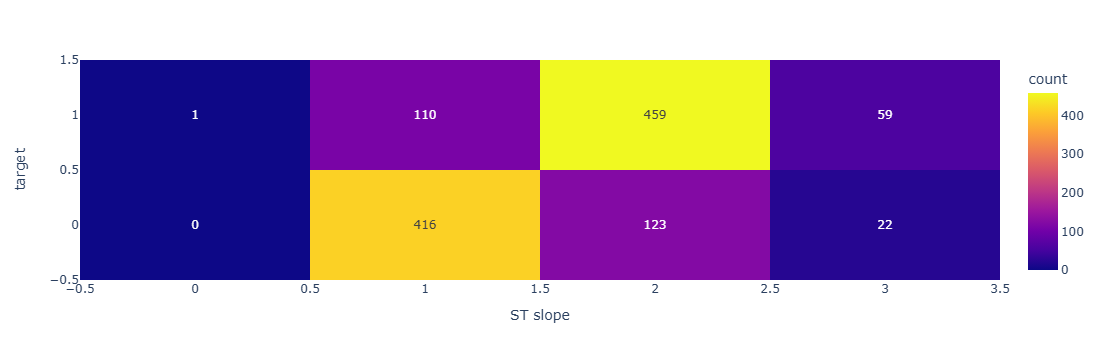

In [188]:
fig = px.density_heatmap(Heart_df, x="ST slope", y="target", text_auto=True)
fig.show()

In [133]:
Heart_df['ST slope'].value_counts().sort_index()

ST slope
0      1
1    526
2    582
3     81
Name: count, dtype: int64

In [ ]:
# we can delete the 0 column

In [137]:
# resting ecg
Heart_df['resting ecg'].value_counts().sort_index()

resting ecg
0    684
1    181
2    325
Name: count, dtype: int64

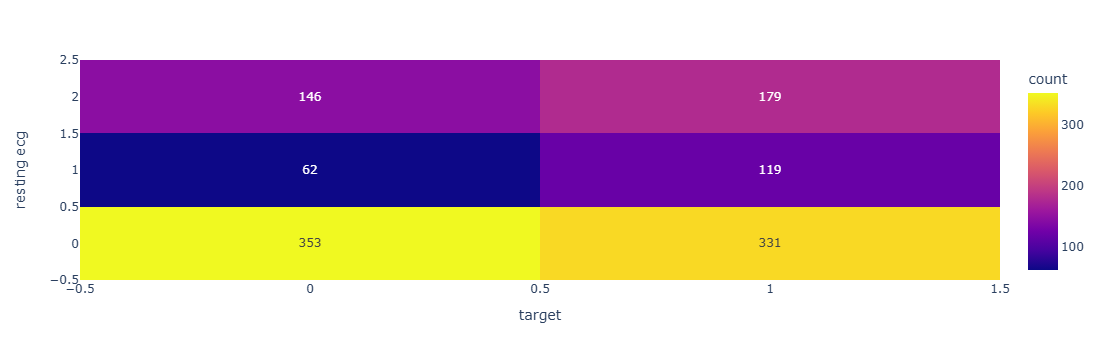

In [193]:
fig = px.density_heatmap(Heart_df, x="target", y="resting ecg", text_auto=True)
fig.show()

In [140]:
# exercise angina
Heart_df['exercise angina'].value_counts().sort_index()

exercise angina
0    729
1    461
Name: count, dtype: int64

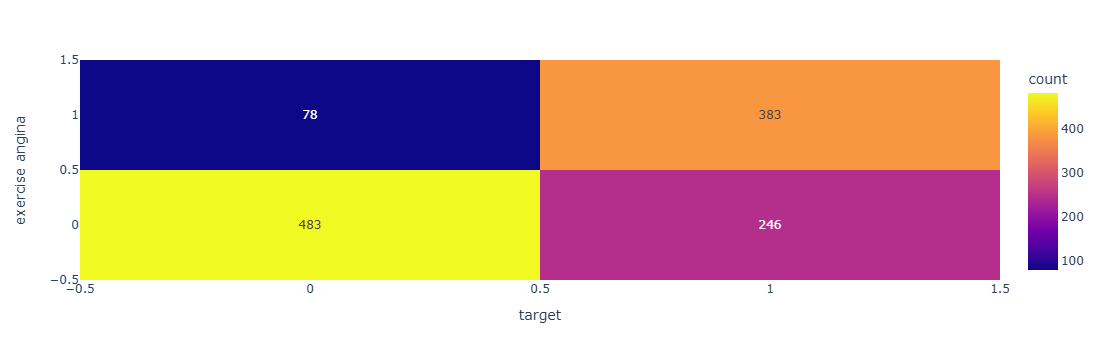

In [194]:
fig = px.density_heatmap(Heart_df, x="target", y="exercise angina", text_auto=True)
fig.show()

In [142]:
####

In [143]:
# target
Heart_df['target'].value_counts().sort_index()

target
0    561
1    629
Name: count, dtype: int64

<Axes: >

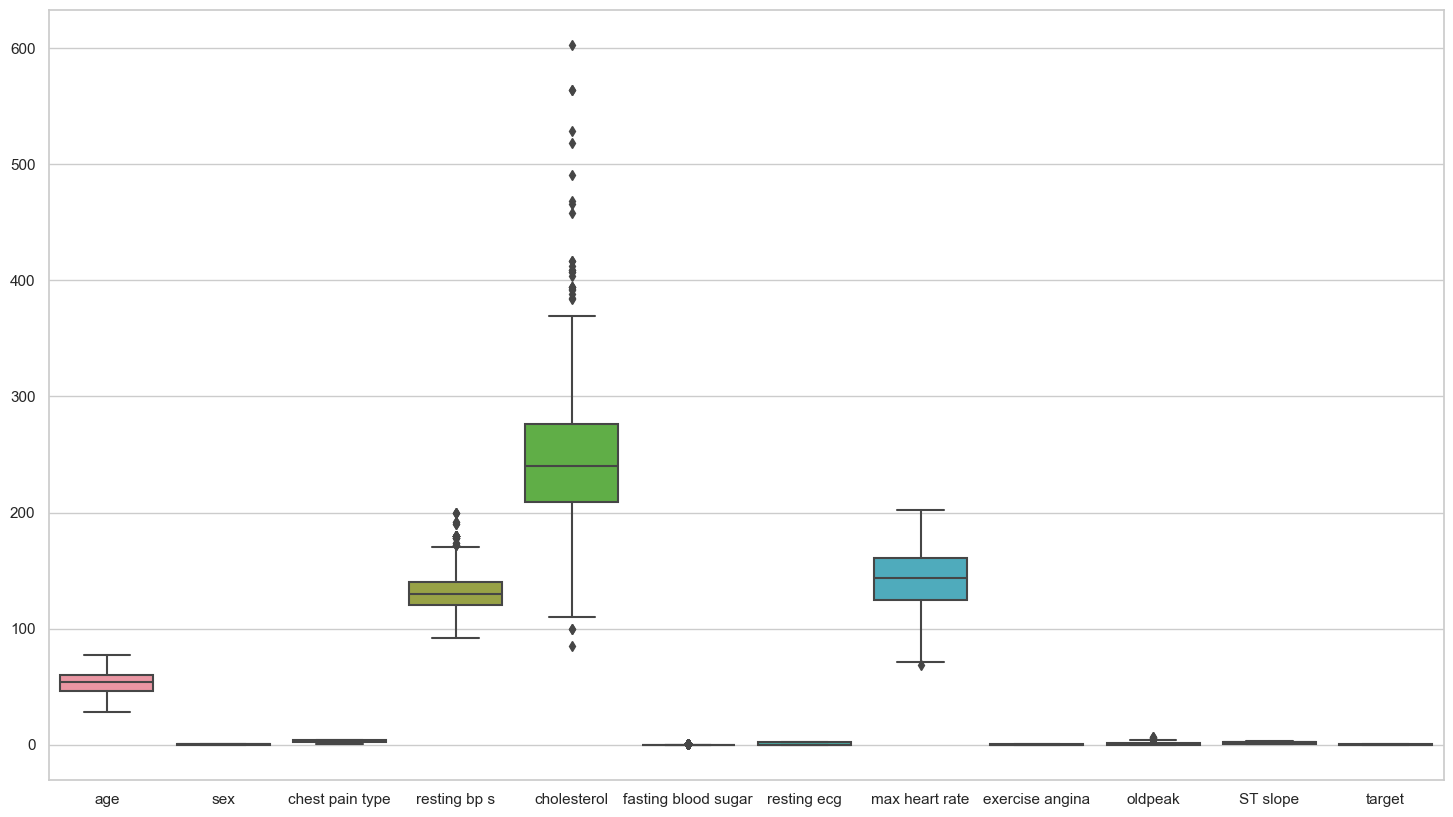

In [145]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=Heart_df1)

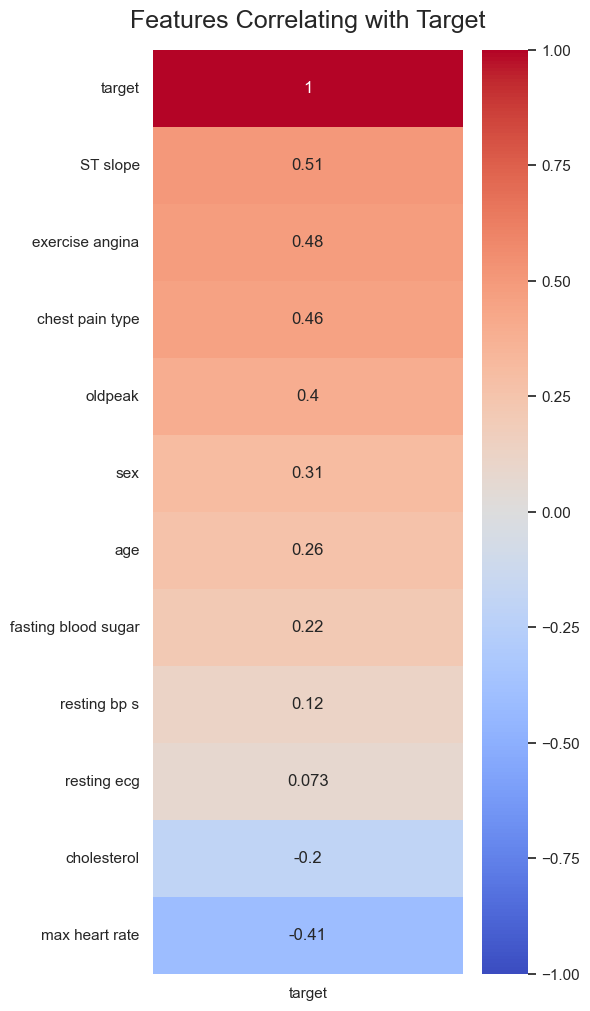

In [147]:
plt.figure(figsize=(5, 12))
heatmap = sns.heatmap(Heart_df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

In [148]:
Heart_df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [149]:
a=['target','age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 ]
df=Heart_df[a]

#### From above corr matrix we can see that the feature ST slove is highly correlated with oldpeak and exercise angina 
#### chest pain type and exercise angina had 40 % positive correlation.

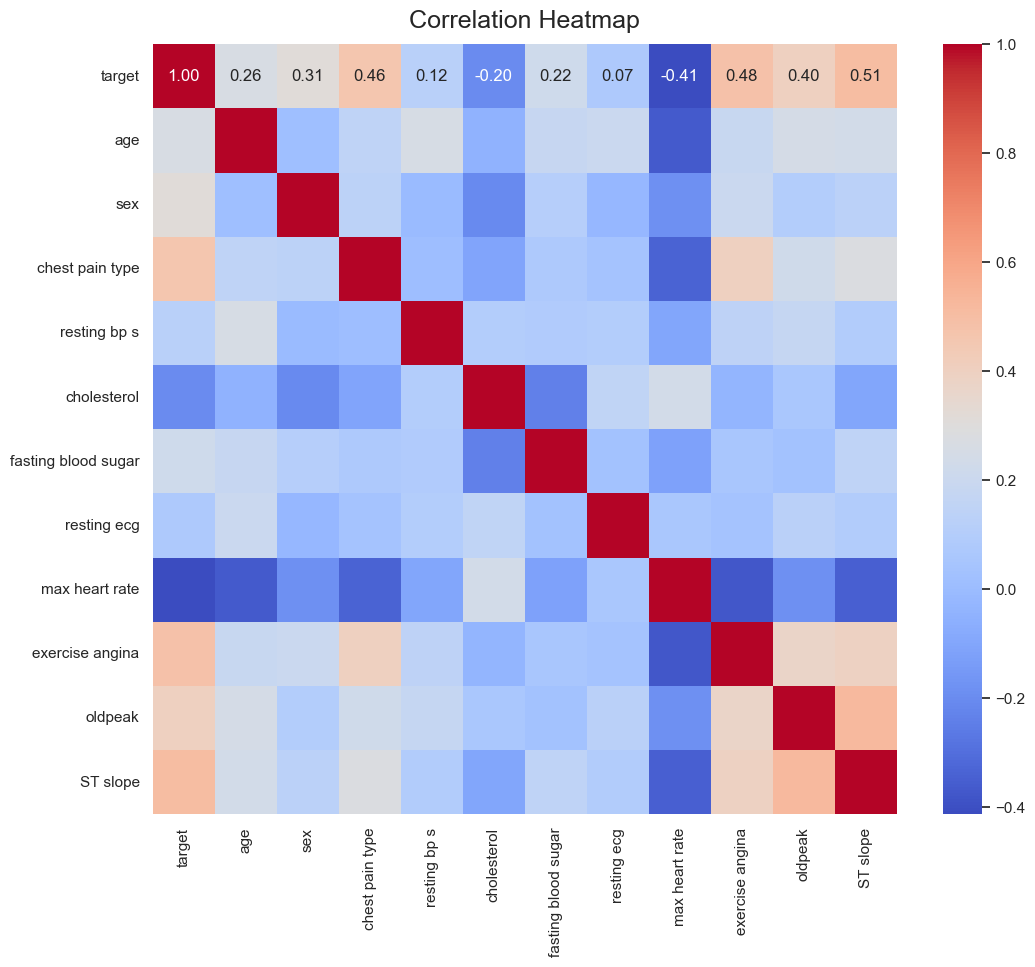

In [150]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True,fmt=".2f", cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [157]:
df['exercise angina'].corr(df['chest pain type'])

0.4034277306074579

Binned Categories:

Age:
Young Adult: Ages 0-35
Middle-Aged Adult: Ages 36-55
Senior: Ages 56 and above

Cholesterol:
Desirable: Less than 200 mg/dL
Borderline High: 200-239 mg/dL
High: 240 mg/dL and above

#### 

In [171]:
# Binning for 'age'
age_bins = [0, 35, 55, 120]  # Covering range from 0 to 120 for completeness
age_labels = ['Young Adult', 'Middle-Aged Adult', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Binning for 'cholesterol'
cholesterol_bins = [0, 200, 240, 1000]  # Covering up to 1000 for completeness
cholesterol_labels = ['Desirable', 'Borderline High', 'High']
df['cholesterol_group'] = pd.cut(df['cholesterol'], bins=cholesterol_bins, labels=cholesterol_labels, right=False)

# Show the first few rows to confirm binning
df[['age', 'age_group', 'cholesterol', 'cholesterol_group']].head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2476\694784542.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2476\694784542.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,age_group,cholesterol,cholesterol_group
0,40,Middle-Aged Adult,289,High
1,49,Middle-Aged Adult,180,Desirable
2,37,Middle-Aged Adult,283,High
3,48,Middle-Aged Adult,214,Borderline High
4,54,Middle-Aged Adult,195,Desirable


In [172]:
from scipy.stats import chi2_contingency
# converting the 'target' into the categorical one
df['Target'] = df['target'].astype(str)
def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Apply Cramér's V for categorical variables against the target
categorical_columns = ['age', 'cholesterol_group']
cramers_v_results = {col: cramers_v(df[col], df['Target']) for col in categorical_columns}

cramers_v_results


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2476\3550335520.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'age': 0.3083440793846087, 'cholesterol_group': 0.13925064512615684}

In [170]:
# we can delete the age and cholesterol columns 
df['age']

#correlation is poor with target so we decided not to do the columns binning

df['cholesterol_group'] 


0                  High
1             Desirable
2                  High
3       Borderline High
4             Desirable
             ...       
1185               High
1186          Desirable
1187          Desirable
1188    Borderline High
1189          Desirable
Name: cholesterol_group, Length: 1190, dtype: category
Categories (3, object): ['Desirable' < 'Borderline High' < 'High']

In [173]:
df['age_group']

0       Middle-Aged Adult
1       Middle-Aged Adult
2       Middle-Aged Adult
3       Middle-Aged Adult
4       Middle-Aged Adult
              ...        
1185    Middle-Aged Adult
1186               Senior
1187               Senior
1188               Senior
1189    Middle-Aged Adult
Name: age_group, Length: 1190, dtype: category
Categories (3, object): ['Young Adult' < 'Middle-Aged Adult' < 'Senior']